In [1]:
!git clone https://github.com/Karan-Malik/FaceMaskDetector

Cloning into 'FaceMaskDetector'...
remote: Enumerating objects: 1543, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 1543 (delta 44), reused 71 (delta 30), pack-reused 1454
Receiving objects: 100% (1543/1543), 84.40 MiB | 38.21 MiB/s, done.
Resolving deltas: 100% (61/61), done.


In [2]:
import numpy as np
import keras
import keras.backend as k
from keras.layers import Conv2D,MaxPooling2D,SpatialDropout2D,Flatten,Dropout,Dense
from keras.models import Sequential,load_model
from keras.preprocessing import image
import cv2
import datetime

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [4]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [5]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [7]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [8]:
training_set = train_datagen.flow_from_directory(
        '/content/FaceMaskDetector/train',
        target_size=(150,150),
        batch_size=16 ,
        class_mode='binary')

Found 1314 images belonging to 2 classes.


In [9]:
test_set = test_datagen.flow_from_directory(
        '/content/FaceMaskDetector/test',
        target_size=(150,150),
        batch_size=16,
        class_mode='binary')

Found 194 images belonging to 2 classes.


In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
model_saved=model.fit_generator(
        training_set,
        epochs=10,
        validation_data=test_set,
        )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/10
83/83 [==============================] - 45s 529ms/step - loss: 0.4478 - accuracy: 0.7747 - val_loss: 0.1887 - val_accuracy: 0.9227
Epoch 2/10
83/83 [==============================] - 42s 510ms/step - loss: 0.1637 - accuracy: 0.9361 - val_loss: 0.3280 - val_accuracy: 0.8660
Epoch 3/10
83/83 [==============================] - 42s 509ms/step - loss: 0.1320 - accuracy: 0.9566 - val_loss: 0.1135 - val_accuracy: 0.9742
Epoch 4/10
83/83 [==============================] - 42s 506ms/step - loss: 0.1067 - accuracy: 0.9559 - val_loss: 0.1084 - val_accuracy: 0.9639
Epoch 5/10
83/83 [==============================] - 42s 510ms/step - loss: 0.0783 - accuracy: 0.9772 - val_loss: 0.0984 - val_accuracy: 0.9742
Epoch 6/10
83/83 [==============================] - 42s 509ms/step - loss: 0.0638 - accuracy: 0.9734 - val_loss: 0.1334 - val_accuracy: 0.9588
Epoch 7/10
83/83 [==============================] - 43s 522ms/step - loss: 0.0708 - accuracy: 0.9749 - val_loss: 0.0937 - val_accuracy: 0.9742

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

In [13]:
model.save('mymodel.h5',model_saved)

In [14]:
mymodel=load_model('mymodel.h5')

In [15]:
import cv2
import matplotlib.pyplot as plt

In [23]:
test_image=image.load_img('/content/FaceMaskDetector/mask.png',
                          target_size=(150,150,3))
test_image
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
if(mymodel.predict(test_image)[0][0] == 0):
  print("With Mask")
else:
  print("Without Mask")

With Mask


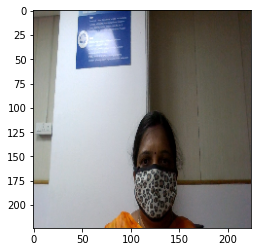

In [27]:
im = cv2.imread('/content/FaceMaskDetector/with mask.jpg')
im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)

plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

In [29]:
test_image=image.load_img('/content/FaceMaskDetector/no mask.jpg',
                          target_size=(150,150,3))
test_image
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
if(mymodel.predict(test_image)[0][0] == 0):
  print("With Mask")
else:
  print("Without Mask")

With Mask


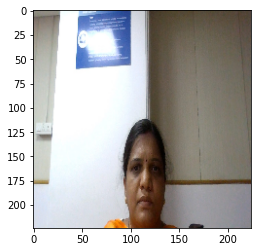

In [31]:
im = cv2.imread('/content/FaceMaskDetector/no mask.jpg')
im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)

plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

In [32]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


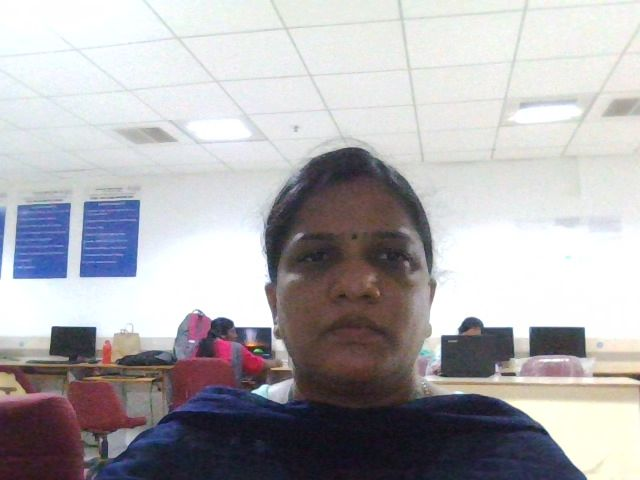

In [33]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [34]:
test_image=image.load_img(filename,
                          target_size=(150,150,3))
test_image
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
if(mymodel.predict(test_image)[0][0] == 0):
  print("With Mask")
else:
  print("Without Mask")

Without Mask
